### 빅데이터분석개론 토픽14 

- 2024 . 07 . 04

-------

#### 14단원. scikit-learn을 통한 기계학습

- 규칙 기반 방식 : 컴퓨터에게 어떤 작업을 시키기 위해 프로그램 작성하여 지시를 하는 방식
- 기계 학습 방식 : 데이터를 기반으로 컴퓨터가 스스로 학습하여 문제 해결
- 기계 학습 : 데이터를 통해 데이터의 패턴 및 규칙을 파악하고 그 규칙에 맞는 모델링을 진행
- 아서 사무엘에 의해 기계 학습이라는 말이 등장

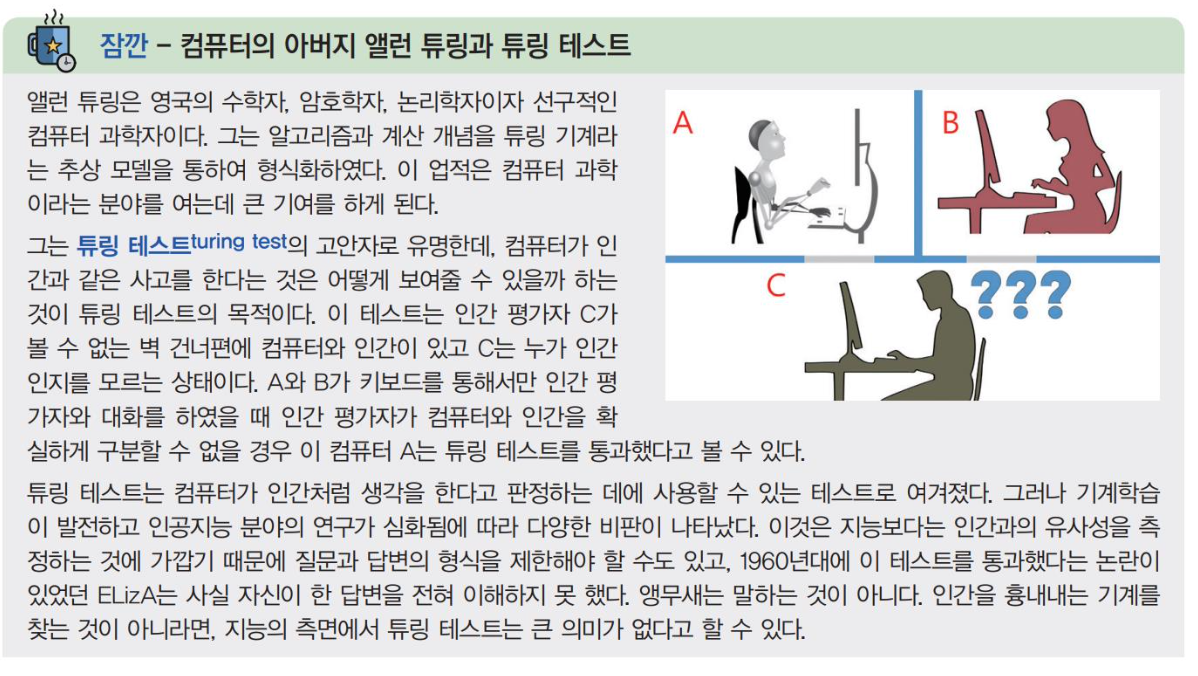

- 지도 학습 : label(target)이 있는 학습
- 비지도 학습 (자율 학습) : label이 없는 학습, 분류, 클러스터링
- 강화학습 : agent와 environment 사이에 행동, 보상이 오가면서 피드백을 통한 학습

---------

- 회귀분석
    - 데이터들을 다차원 공간에 표시, 각 점과의 y값 차이가 가장 적게 나는 함수를 고르기
    - 일차함수의 형태로 구성
    - 선형 회귀 : 독립 변수와 종속 변수와의 상관관계를 모델링 (통계적 기법)
        - y = mx + b
        - 변수가 2개 이상 : 다중 선형 회귀

<br>

- feature
    - 데이터에서 특징 추출 후 이를 학습하고 테스트함 
    - 관찰되는 현상에서 측정할 수 있는 개별적 특성
- scikit-learn
    - 기계학습을 위한 라이브러리

In [1]:
# 4명의 학생을 임의로 추출하여 키와 몸무게 측정 -> 선형회귀

import numpy as np
from sklearn import linear_model

regr = linear_model.LinearRegression()

X = [[164], [179], [162], [170]] # 2차원 배열로 넣음
y = [53, 63, 55, 59]

regr.fit(X, y) # 학습

LinearRegression()

In [7]:
# 기울기, 절편, 점수

print (regr.coef_)
print (regr.intercept_)
score = regr.score(X, y) # 점수 산출 (보통 여기에 test_set을 넣음)
print (score)

[0.55221745]
-35.686695278969964
0.903203123105647


In [10]:
# 예측
# 값을 넣을 때는 항상 "2차원 배열" 형태로 넣어야 함 (리스트의 리스트)

print(regr.coef_ * 178 + regr.intercept_) # 수동으로 계산
print(regr.predict([[178]])) # 키가 178일때는 몸무게가 62kg 정도 될듯
print(regr.predict([[178], [181]])) # 178, 181일 때

[62.60801144]
[62.60801144]
[62.60801144 64.26466381]


In [12]:
# 남자는 0, 여자는 1로 하여 차원을 추가
# 키, 성별을 넣었을 때 몸무게를 예측

X = [[164, 1], [167, 0], [155, 1], [180, 0]]
y = [51, 60, 47, 78]

regr.fit(X, y)
regr.predict([[166, 1], [166, 0]]) # 키가 166인 여자, 키가 166인 남자의 몸무게 예측

array([56.02, 60.9 ])

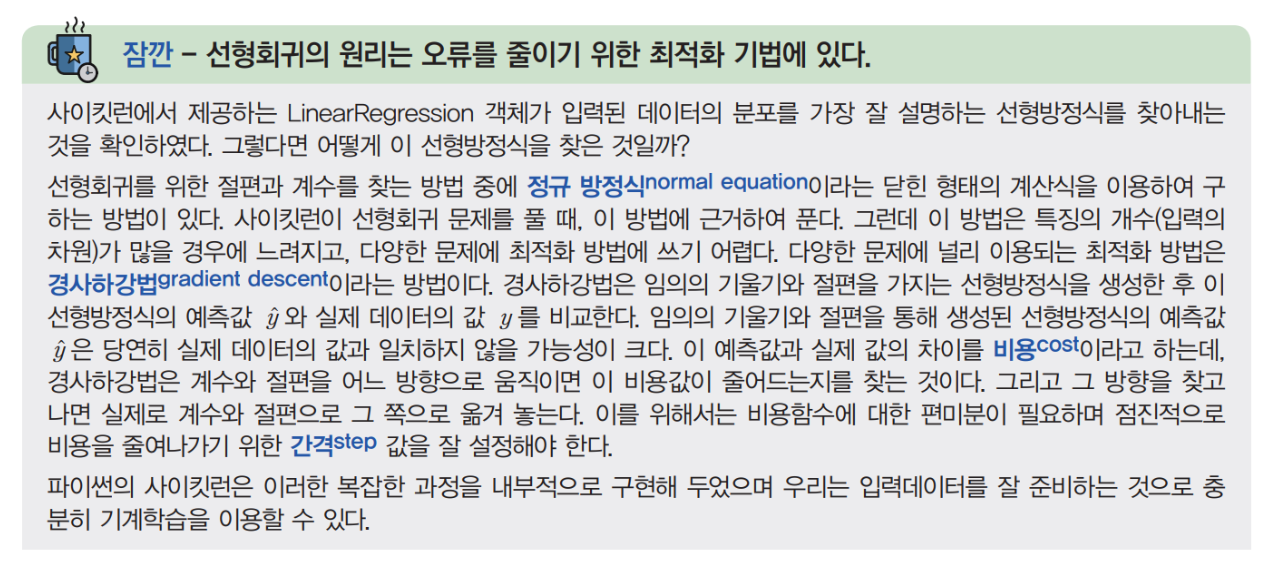

- cost가 적어지는 방향으로 직선을 유추
- step이 작다 -> 오래 걸린다
- step이 크다 -> 짧게 걸리기는 하는데 정확한 값을 찾을 수 없다
- 따라서 step을 잘 세팅하는 것이 중요

---------


In [16]:
# scikit-learn에 기본적으로 포함된 diabetes 데이터를 이용한 회귀

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets

diabetes = datasets.load_diabetes()
print (diabetes.data.shape) # 442 by 10 크기 (10개의 features, 442개의 records)
print (diabetes.data) # 데이터
print (diabetes.feature_names) # 특성
print (diabetes.target) # label

(442, 10)
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 14

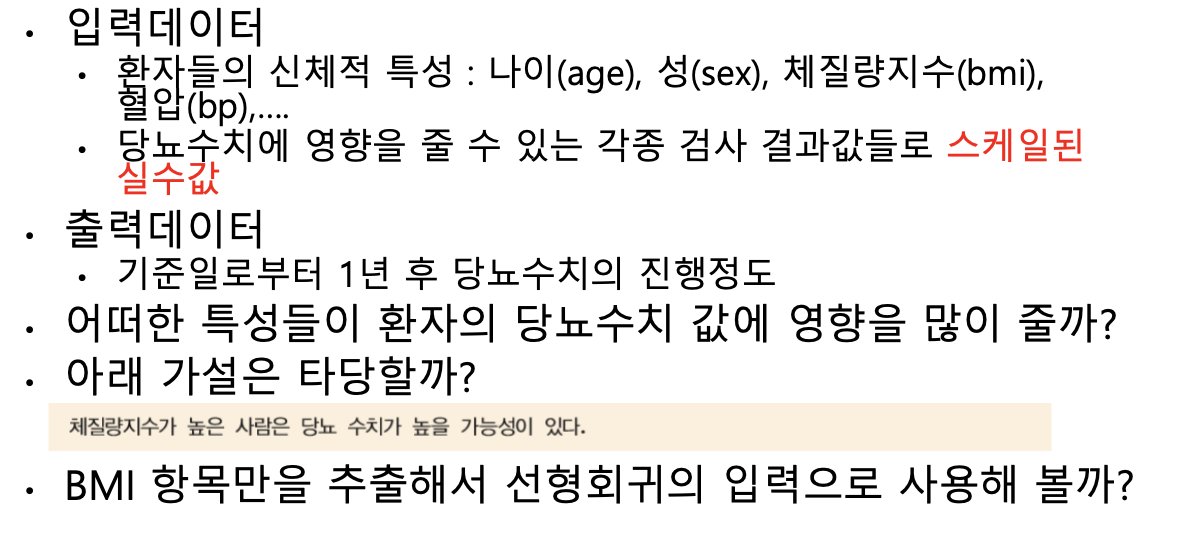

In [20]:
# BMI 항목 추출

# bmi = [diabetes.data[i][2] for i in diabetes.data]
# print (bmi)

X = diabetes.data[:, 2] # 2번 열만 추출
X = diabetes.data[:, np.newaxis, 2] # 배열의 차원을 증가 (입력 데이터는 2차원 배열이니깐)
print (X[:5, :])

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]]


In [21]:
# 학습

regr = LinearRegression()
regr.fit(X, diabetes.target)
print (regr.coef_, regr.intercept_) # 기울기, 편향 (y절편)

[949.43526038] 152.13348416289617


In [27]:
# 만약에 predict 이전에 학습한 데이터를 넣으면 당연히 정확도가 높을 것
# 따라서 trian set과 test set을 나눌 필요가 있어 보인다

# train 데이터와 test 데이터를 분리
# 보통 train_set을 80%, test_set을 20%로 잡는다

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(diabetes.data, diabetes.target, test_size=0.2)

In [29]:
# train set을 이용하여 학습, test set을 이용하여 predict

regr.fit(train_X, train_y)
print (regr.score(train_X, train_y))
regr.predict(test_X)

0.5606016425962284


array([237.10597902, 163.81884076,  86.52856151, 226.66244112,
       108.9451113 , 270.80427798, 136.17136491,  96.46685946,
        48.90641213, 203.22798925, 222.14029171, 142.95650053,
       162.1654697 , 174.64162487, 186.32621348, 305.61674628,
        67.17645606, 200.89028369, 108.08095086, 168.85315624,
        75.77562143, 149.22138605,  82.63722591,  83.43234265,
       136.20527296, 177.1791635 ,  93.347872  , 173.24654209,
        79.41995305, 236.75382023, 147.26050686, 216.54389109,
       173.28785159, 169.57853153, 203.9776946 , 186.08356405,
       121.6472167 , 242.39684865, 223.89413279, 108.59580611,
       152.05084532, 211.68353269, 166.77206257, 234.65684673,
       213.31168543, 105.04848025, 197.1233298 , 180.81722495,
       112.61300069,  67.5405699 , 150.45242014, 125.58200012,
       118.10069694, 233.400176  , 147.16357923, 161.92152643,
       119.88620087,  70.68556061, 129.87513061, 109.46582181,
       108.3908819 , 181.23547942,  63.17339419,  93.14

-------

- 목표값과 예측값의 차이 == 오차
- 오차를 최소화하는 방법
    - 평균 제곱 오차
    - 오차 제곱법
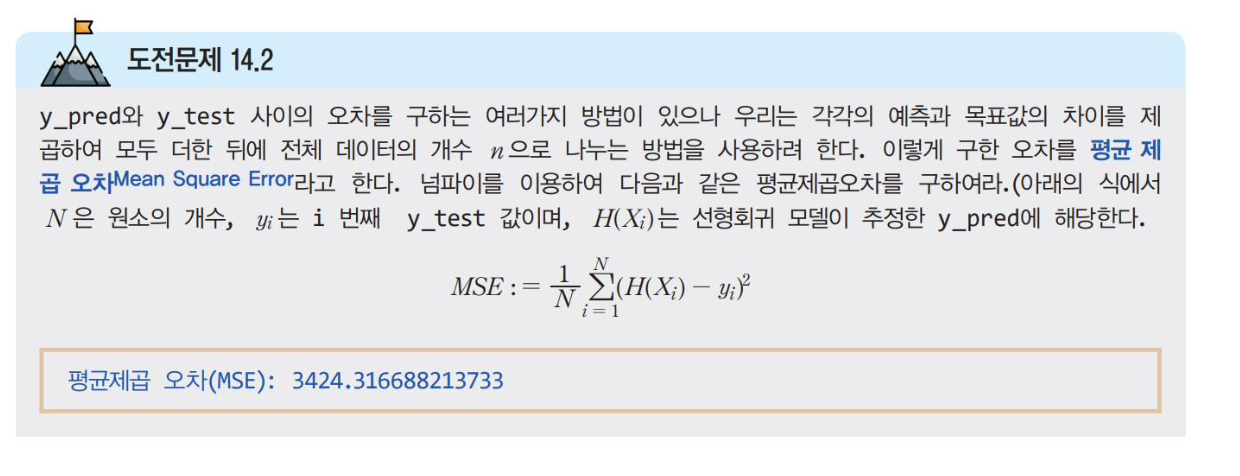


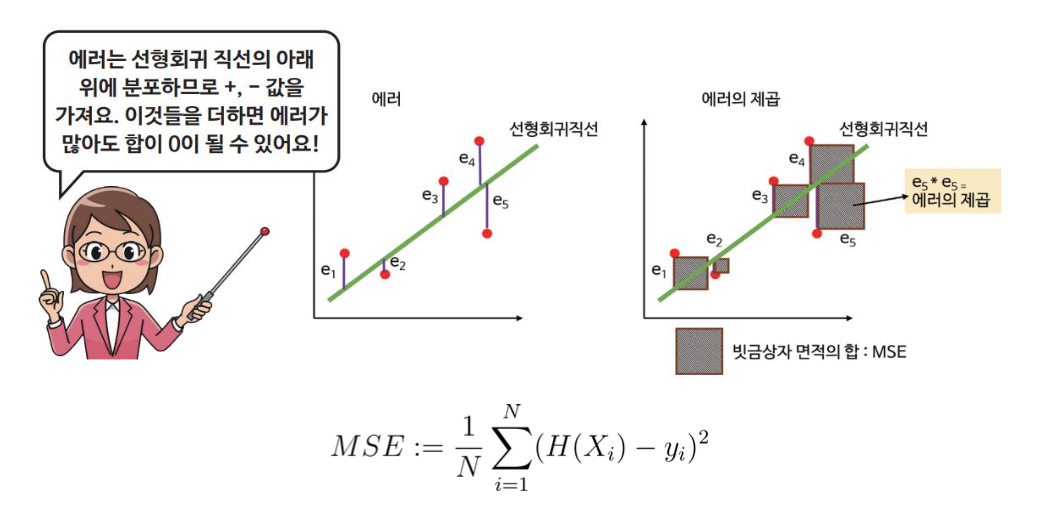

------

- KNN
    - 기계학습의 분류 문제, 지도학습
    - 특징공간에서 거리가 가장 가까운 k개의 데이터를 찾아서 클래스를 파악하여 분류
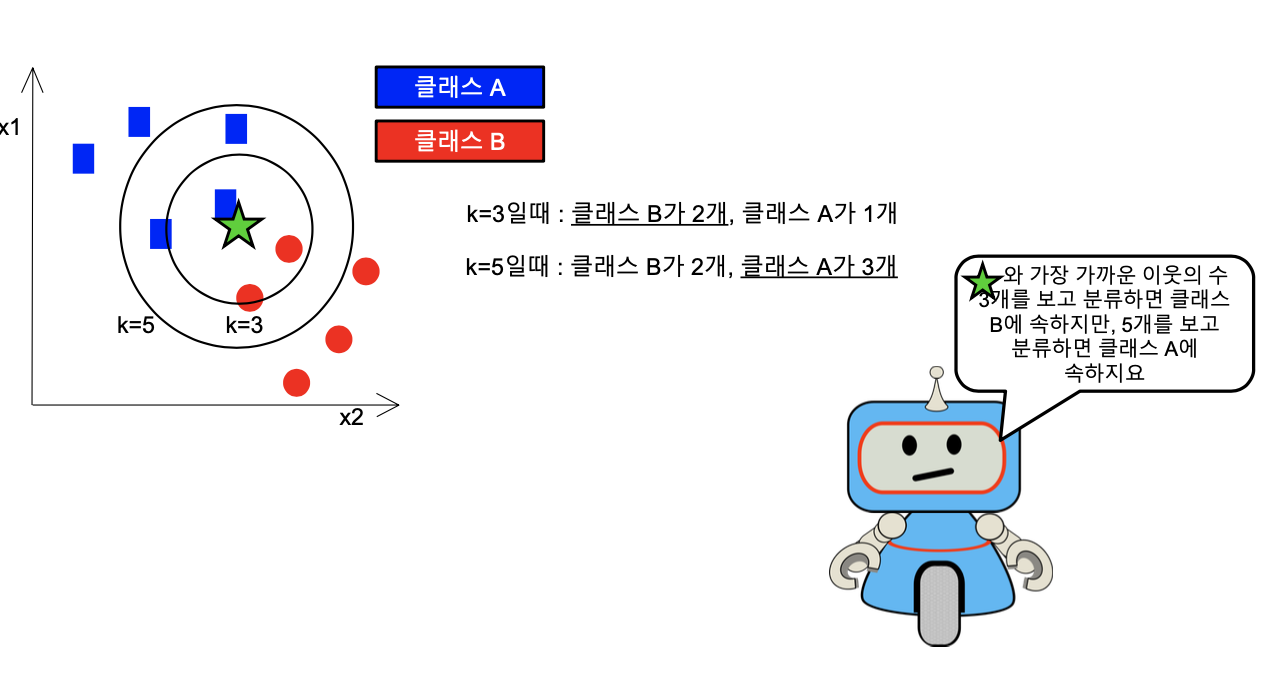

- euclidean distance를 모두 재고, sort하여 자신과 거리가 가장 가까운 요소의 클래스들을 조사하고, 가장 많은 클래스가 입력 데이터의 클래스가 된다고 유추

In [33]:
# 붓꽃의 종류 분류 
# petal, sepal의 너비와 높이 정보가 있는 데이터

from sklearn.datasets import load_iris
iris = load_iris()
print (iris.data[0:6, :])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]]


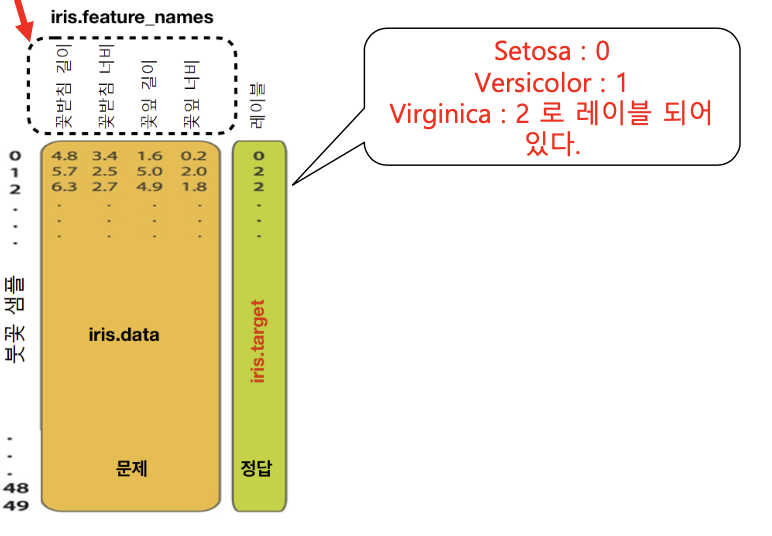

In [35]:
print(iris.data.shape) # 모양
print(iris.feature_names) # 특징 이름
print(iris.target) # target, 0, 1, 2로 인코딩되어 있음

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [42]:
# 8:2 = train_set:test_set
# 8:2로 나뉠때 랜덤으로 나누어짐

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
# 학습용 데이터와 테스트 데이터를 (80:20)으로 분할한다. 
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.2)

from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

num_neigh = 6
knn = KNeighborsClassifier(n_neighbors = num_neigh)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
scores = metrics.accuracy_score(y_test, y_pred)
print('n_neighbors가 {0:d}일때 정확도: {1:.3f}'.format(num_neigh, scores))

n_neighbors가 6일때 정확도: 0.933


In [43]:
classes = {0:'setosa', 1:'versicolor', 2:'virginica'} 
 
# 아직 보지 못한 새로운 데이터를 제시해 보자. 
X = [[3,4,5,2], [5,4,2,2]]
y = knn.predict(X)

print(classes[y[0]])    # 새로운 특성값을 가지는 데이터에 대한 예측값을 출력 
print(classes[y[1]])

versicolor
setosa


------

- 분류 모델의 정확성을 분석할 때는 (정답, 예측) 쌍으로 데이터를 만들어 2차원 히스토그램을 그림
- seaborn 라이브러리의 heatmap()으로 연관 행렬 (headmap)을 그릴 수 있음